In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import max_error,mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
db = pd.read_csv('used_cars_data.csv')
db.drop_duplicates(keep='last',inplace=True)

# percentage of NULL Values
db.isna().sum()/len(db) * 100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [20]:
db.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [21]:
def cvt_to_float(n):
    if isinstance(n,str): #checks if the columns are string datatype
        if n.endswith('kmpl'):
            return float(n.split('kmpl')[0])     
        elif n.endswith('km/kg'):                   
            return float(n.split('km/kg')[0])
        elif n.endswith('CC'):
            return float(n.split('CC')[0])
        elif n.startswith('null'):     #replaces values that have string 'null bhp' to Nan
            return(None)          
        elif n.endswith('bhp'):
             return float(n.split('bhp')[0])
        elif n.endswith('Lakh'):
            return float(n.split('Lakh')[0])
    else: 
        return None
    

#removing CC kmpl etc and converting string to float    
db['Mileage'] = db['Mileage'].apply(cvt_to_float)
db['Engine'] = db['Engine'].apply(cvt_to_float)
db['Power'] = db['Power'].apply(cvt_to_float)
db['New_Price'] = db['New_Price'].apply(cvt_to_float)

#converting fuel type transmission etc from string to number
leName = LabelEncoder()
leLocation = LabelEncoder()
leFuel = LabelEncoder()
leTransmission = LabelEncoder()
leOwner = LabelEncoder()

db['Name'] = leName.fit_transform(db['Name'])
db['Location'] = leLocation.fit_transform(db['Location'])
db['Fuel_Type'] = leFuel.fit_transform(db['Fuel_Type'])
db['Transmission'] = leTransmission.fit_transform(db['Transmission'])
db['Owner_Type'] = leOwner.fit_transform(db['Owner_Type'])

db = db.dropna()
db.head()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,2,529,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,8.61,4.50
7,7,1933,9,2016,36000,1,0,0,11.36,2755.0,171.50,8.0,21.00,17.50
10,10,1139,7,2018,25692,4,1,0,21.56,1462.0,103.25,5.0,10.65,9.95
15,15,1489,4,2014,110000,1,1,0,13.50,2477.0,175.56,7.0,32.01,15.00
20,20,76,7,2014,32982,1,0,0,22.69,1995.0,190.00,5.0,47.87,18.55


In [22]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 2 to 6014
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              806 non-null    int64  
 1   Name               806 non-null    int64  
 2   Location           806 non-null    int64  
 3   Year               806 non-null    int64  
 4   Kilometers_Driven  806 non-null    int64  
 5   Fuel_Type          806 non-null    int64  
 6   Transmission       806 non-null    int64  
 7   Owner_Type         806 non-null    int64  
 8   Mileage            806 non-null    float64
 9   Engine             806 non-null    float64
 10  Power              806 non-null    float64
 11  Seats              806 non-null    float64
 12  New_Price          806 non-null    float64
 13  Price              806 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 94.5 KB


In [23]:
Y = db['Price']
X = db.drop(['Price','S.No.'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
x_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
1324,1179,3,2019,16862,4,1,0,20.89,1197.0,81.80,5.0,6.07
2990,1160,9,2018,14000,1,1,0,25.47,1248.0,88.50,7.0,11.66
2700,1318,6,2015,64876,4,1,0,21.50,1197.0,81.80,5.0,5.71
3052,738,9,2016,50000,1,1,0,25.40,1186.0,73.97,5.0,8.84
1159,614,7,2018,50234,4,1,0,18.90,1197.0,81.86,5.0,6.32


In [24]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 1324 to 746
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               604 non-null    int64  
 1   Location           604 non-null    int64  
 2   Year               604 non-null    int64  
 3   Kilometers_Driven  604 non-null    int64  
 4   Fuel_Type          604 non-null    int64  
 5   Transmission       604 non-null    int64  
 6   Owner_Type         604 non-null    int64  
 7   Mileage            604 non-null    float64
 8   Engine             604 non-null    float64
 9   Power              604 non-null    float64
 10  Seats              604 non-null    float64
 11  New_Price          604 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 61.3 KB


Text(0, 0.5, 'Frequency')

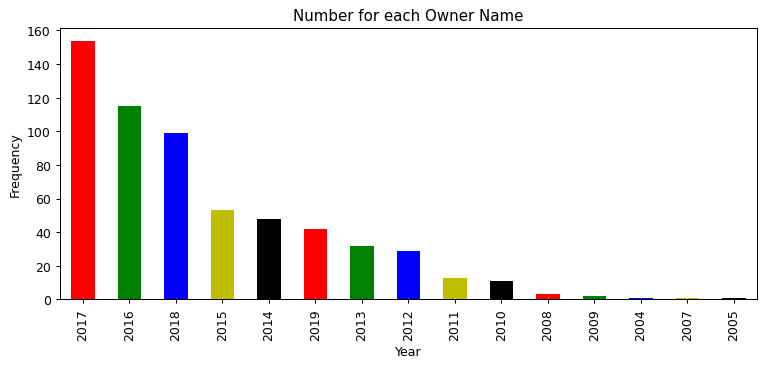

In [43]:
ax = x_train['Year'].value_counts().plot(kind='bar',title="Number for each Owner Name" , color = ['r','g','b','y','k'])
ax.set_xlabel("Year")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

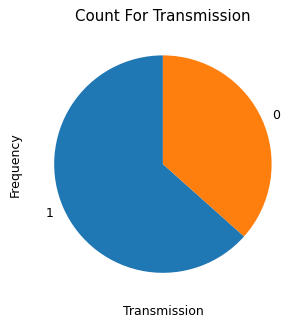

In [53]:
ax = x_train['Transmission'].value_counts().plot(kind='pie',title="Count For Transmission", startangle = 90)
ax.set_xlabel("Transmission")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

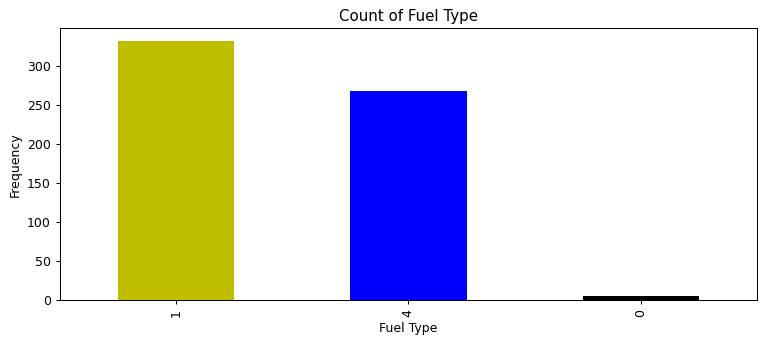

In [48]:
ax = x_train['Fuel_Type'].value_counts().plot(kind='bar',title="Count of Fuel Type" , color= ['y','b','k'])
ax.set_xlabel("Fuel Type")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

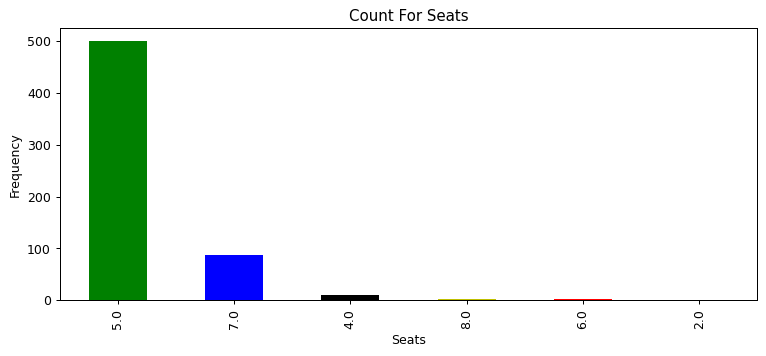

In [50]:
ax = x_train['Seats'].value_counts().plot(kind='bar',title="Count For Seats",color = ['g','b','k','y','r'])
ax.set_xlabel("Seats")
ax.set_ylabel("Frequency")

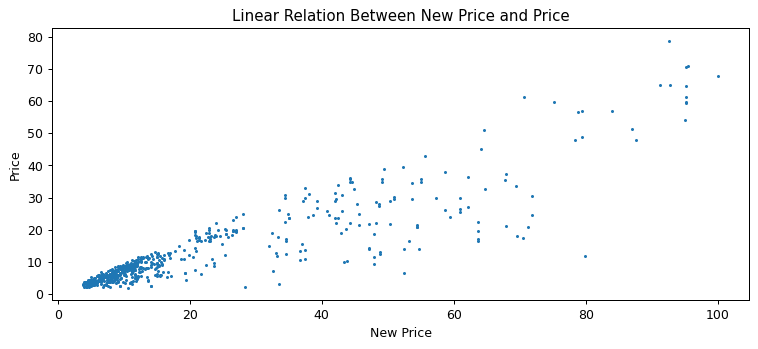

In [29]:
new_price = x_train['New_Price']
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 90

plt.scatter(x = new_price , y = y_train , s = 2)
plt.title("Linear Relation Between New Price and Price")
plt.xlabel('New Price')
plt.ylabel("Price")
plt.show()

In [30]:
model = LinearRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

In [31]:
model.score(x_test , y_test)

0.9148095930364379

In [32]:
print("Max Error" , max_error(y_test , y_pred))
print("Root Mean Square Error" , mean_squared_error(y_test , y_pred)**0.5)

Max Error 19.195270603144944
Root Mean Square Error 3.779757603023922


In [33]:
print("Intercept of the linear equation:", model.intercept_) 
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

Intercept of the linear equation: -2274.8804261995424
The coefficient for Name is 0.0018440847063597896
The coefficient for Location is -0.040945411898572794
The coefficient for Year is 1.1310422673242086
The coefficient for Kilometers_Driven is -3.8653381790321184e-05
The coefficient for Fuel_Type is -0.09937889122037918
The coefficient for Transmission is 1.2837228657904223
The coefficient for Owner_Type is -0.2531747058761778
The coefficient for Mileage is -0.19068186566732184
The coefficient for Engine is 0.002154593726286202
The coefficient for Power is -0.023116482057122186
The coefficient for Seats is -0.43172016109779326
The coefficient for New_Price is 0.5752791717408151


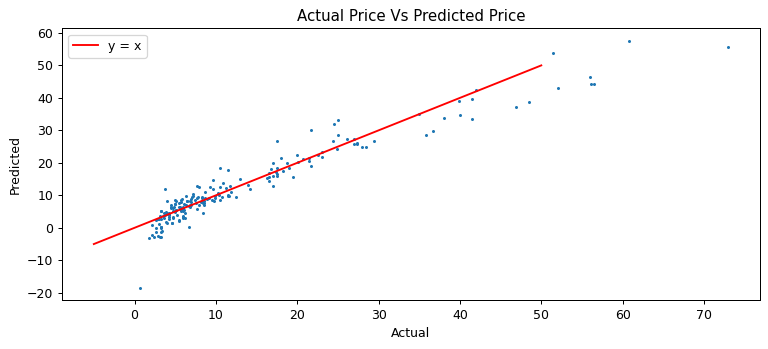

In [34]:
pred_price = y_pred
plt.rcParams['figure.figsize'] = [10, 4]

plt.scatter(x = y_test , y = y_pred , s = 2)
plt.title("Actual Price Vs Predicted Price")
plt.xlabel('Actual')
plt.ylabel("Predicted")

x = np.linspace(-5,50,100)
plt.plot(x,x , '-r' , label = "y = x")
plt.legend(loc='upper left')
plt.show()